In [ ]:
from arc_prize.model import ARCTransformerEncoderDecoderParams
from arc_prize.train import ARCModelState, ARCTrainParams
from arc_prize.train_on_modal import get_model, modal_app, train
from arc_prize.vis import visualize_epochs
import modal
import torch
import petname


In [11]:


model_params = ARCTransformerEncoderDecoderParams(
  grid_dim=12,
  num_train_pairs=4,
  num_colors=10,
  num_encoder_layers=1,
  num_decoder_layers=1,
  num_heads=1,
  d_model=16,
  d_ff=16*2,
  dropout=0.05
)

train_params = ARCTrainParams(
  batch_size=5,
  learning_rate=1e-3,
  weight_decay=1e-4,
  dataset_name="move_many_random_2000"
)

num_epochs = 10

model_name = petname.generate(words=3, separator='_')

# model_name = "merely_frank_collie"
# model_params = None
# train_params = None



print("Model name", model_name)

# checkpoint = None
# fn = modal.Function.lookup("arc-prize", "train")
with modal_app.run(show_progress=False):
  fn_call = train.spawn(model_name, num_epochs, model_params, train_params)
  print(fn_call.object_id)
  # poorly_hip_quagga = ARCModelState(**get_model.remote("poorly_hip_quagga"))
  # merely_frank_collie = ARCModelState(**get_model.remote("merely_frank_collie"))


  






Model name only_major_ghost
Object(fc-01J4Q9DKXT6TMYKNJQA7HP5FQF)


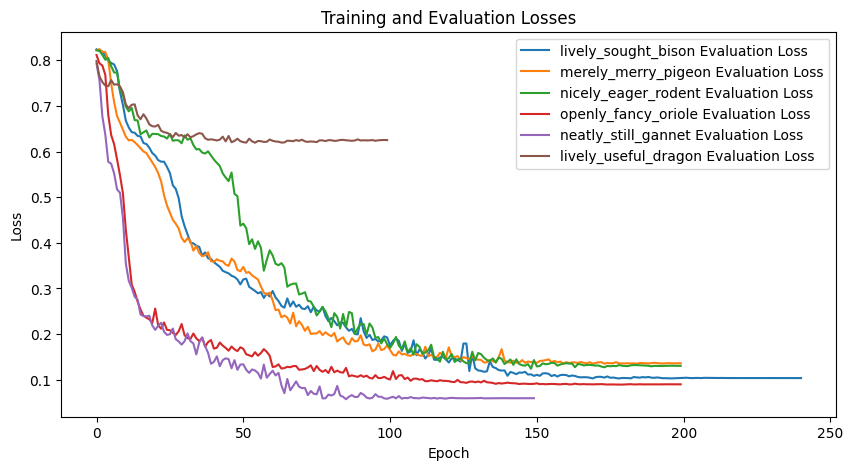

In [7]:
model_names = [
  # "poorly_hip_quagga", # 8 heads
  # "merely_frank_collie", # 4 heads
  "lively_sought_bison", # 2 heads
  # "unduly_gentle_serval", # 2 heads, 1 decoder
  # "purely_large_rabbit", # 2 heads, 1 encoder, 1 decoder
  # "lovely_crisp_ferret", # 4 heads, 1 encoder, 1 decoder, *2 ff
  # "rarely_exotic_goat",
  "merely_merry_pigeon",
  "nicely_eager_rodent",
  "openly_fancy_oriole", # Extra data, batch size 16
  "neatly_still_gannet", # 2000 data, batch size 5
  "lively_useful_dragon"
]

epochs = {}
# params = {}

# checkpoint = None
# fn = modal.Function.lookup("arc-prize", "train")
with modal_app.run(show_progress=False):
  for name in model_names:
    checkpoint = ARCModelState(**get_model.remote(name))
    # params[name] = checkpoint.model_params
    # print(name, checkpoint.model_params)
    epochs[name] = checkpoint.epochs

# print(params)
visualize_epochs(epochs)

In [ ]:
from arc_prize.train import train_arc_transformer


train_arc_transformer("models/")

In [ ]:
from arc_prize.vis import visualize_output_query, visualize_tensors


# model = ARCTransformer(d_model=d_model, num_heads=num_heads, num_layers=num_layers, d_ff=dim_feedforward, grid_dim=max_grid_size, num_colors=num_colors, num_train_pairs=max_context_pairs, dropout=dropout).to(device)

model_file_name = "models/model_75i3sirg.pth"
if model_file_name is not None:
    state_dict = torch.load(model_file_name, map_location=device)
    model.load_state_dict(state_dict)

model.eval()
eval_loader = DataLoader(val_dataset, batch_size=1, shuffle=True, collate_fn=collate_arc_fn, num_workers=0)
# batch = next(iter(eval_loader))

# visualize_output_query(model.output_query)


for i, batch in enumerate(eval_loader):
    grids, grid_masks, output_grid = [item.to(device) for item in batch]

    predictions = model.generate(grids, grid_masks)
    print(predictions.shape)

    visualize_tensors(grids.squeeze(0), output_grid.squeeze(0), predictions.squeeze(0))

